In [1]:
import atexit
import copy
import gym
import json
from kaggle_environments import make
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random
from scipy.stats import rankdata
from subprocess import Popen, PIPE
import sys
import tqdm
from typing import *

#from lux_ai.lux.game import Game
from lux_ai.lux_gym.lux_env import LuxEnv
from lux_ai.rl_agent.rl_agent import RLAgent

#env = make("lux_ai_2021", configuration={"seed": 56221, "loglevel": 2}, debug=True)
env = make("lux_ai_2021", configuration={"loglevel": 2}, debug=True)
SEED_COUNTER = 0

Loading environment football failed: No module named 'gfootball'


In [2]:
rl_agent = RLAgent(env.steps[0][0]["observation"], env.configuration)

test_env = LuxEnv(rl_agent.model_flags.act_space(), rl_agent.model_flags.obs_space(), env.configuration)

In [3]:
mu_1 = 35.838
mu_2 = 29.581
BETA = 4. + 1. / 6.

def win_probability(mu_1, mu_2):
    exp = (mu_1 - mu_2) / BETA
    n = 4. ** exp
    return n / (n + 1)

win_probability(mu_1, mu_2)

0.889118702815182

In [4]:
env.reset()
env.run(["/home/isaiah/GitHub/Kaggle/Lux_AI_2021/main.py", "/home/isaiah/GitHub/Kaggle/luxai2021_handcrafted_agents/agents/main_coral.py"])

Turn: 1 - Predicted value: 0.02 - Timing info: {Format observation: 0.00 - Model inference: 0.88 - Collision detection: 0.05}
Turn: 2 - Predicted value: 0.04 - Timing info: {Format observation: 0.01 - Model inference: 0.08 - Collision detection: 0.05}
Turn: 3 - Predicted value: 0.03 - Timing info: {Format observation: 0.00 - Model inference: 0.04 - Collision detection: 0.03}
Turn: 4 - Predicted value: 0.06 - Timing info: {Format observation: 0.00 - Model inference: 0.09 - Collision detection: 0.05}
Turn: 5 - Predicted value: 0.06 - Timing info: {Format observation: 0.00 - Model inference: 0.03 - Collision detection: 0.04}
Turn: 6 - Predicted value: -0.01 - Timing info: {Format observation: 0.08 - Model inference: 0.08 - Collision detection: 0.05}
Turn: 7 - Predicted value: 0.04 - Timing info: {Format observation: 0.01 - Model inference: 0.08 - Collision detection: 0.05}
Turn: 8 - Predicted value: 0.08 - Timing info: {Format observation: 0.01 - Model inference: 0.09 - Collision detectio

[[{'action': [],
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 0,
    'width': 32,
    'height': 32,
    'reward': 0,
    'globalUnitIDCount': 2,
    'globalCityIDCount': 2,
    'player': 0,
    'updates': ['0',
     '32 32',
     'rp 0 0',
     'rp 1 0',
     'r coal 0 9 357',
     'r wood 0 15 346',
     'r wood 0 16 346',
     'r coal 0 22 357',
     'r wood 1 4 395',
     'r wood 1 14 326',
     'r wood 1 17 326',
     'r wood 1 27 395',
     'r wood 2 3 361',
     'r wood 2 4 304',
     'r wood 2 13 300',
     'r wood 2 14 388',
     'r wood 2 17 388',
     'r wood 2 18 300',
     'r wood 2 27 304',
     'r wood 2 28 361',
     'r wood 3 3 381',
     'r wood 3 4 368',
     'r wood 3 27 368',
     'r wood 3 28 381',
     'r wood 4 4 337',
     'r wood 4 27 337',
     'r uranium 7 11 346',
     'r uranium 7 12 328',
     'r uranium 7 19 328',
     'r uranium 7 20 346',
     'r uranium 8 10 334',
     'r uranium 8 11 331',
     'r uranium 8

In [5]:
env.render(mode="ipython", height=1000, width=1200)

Turn: 0 - Predicted value: -0.01 - Timing info: {Observation processing: 0.33 - Model inference: 0.05 - Collision detection: 0.01}


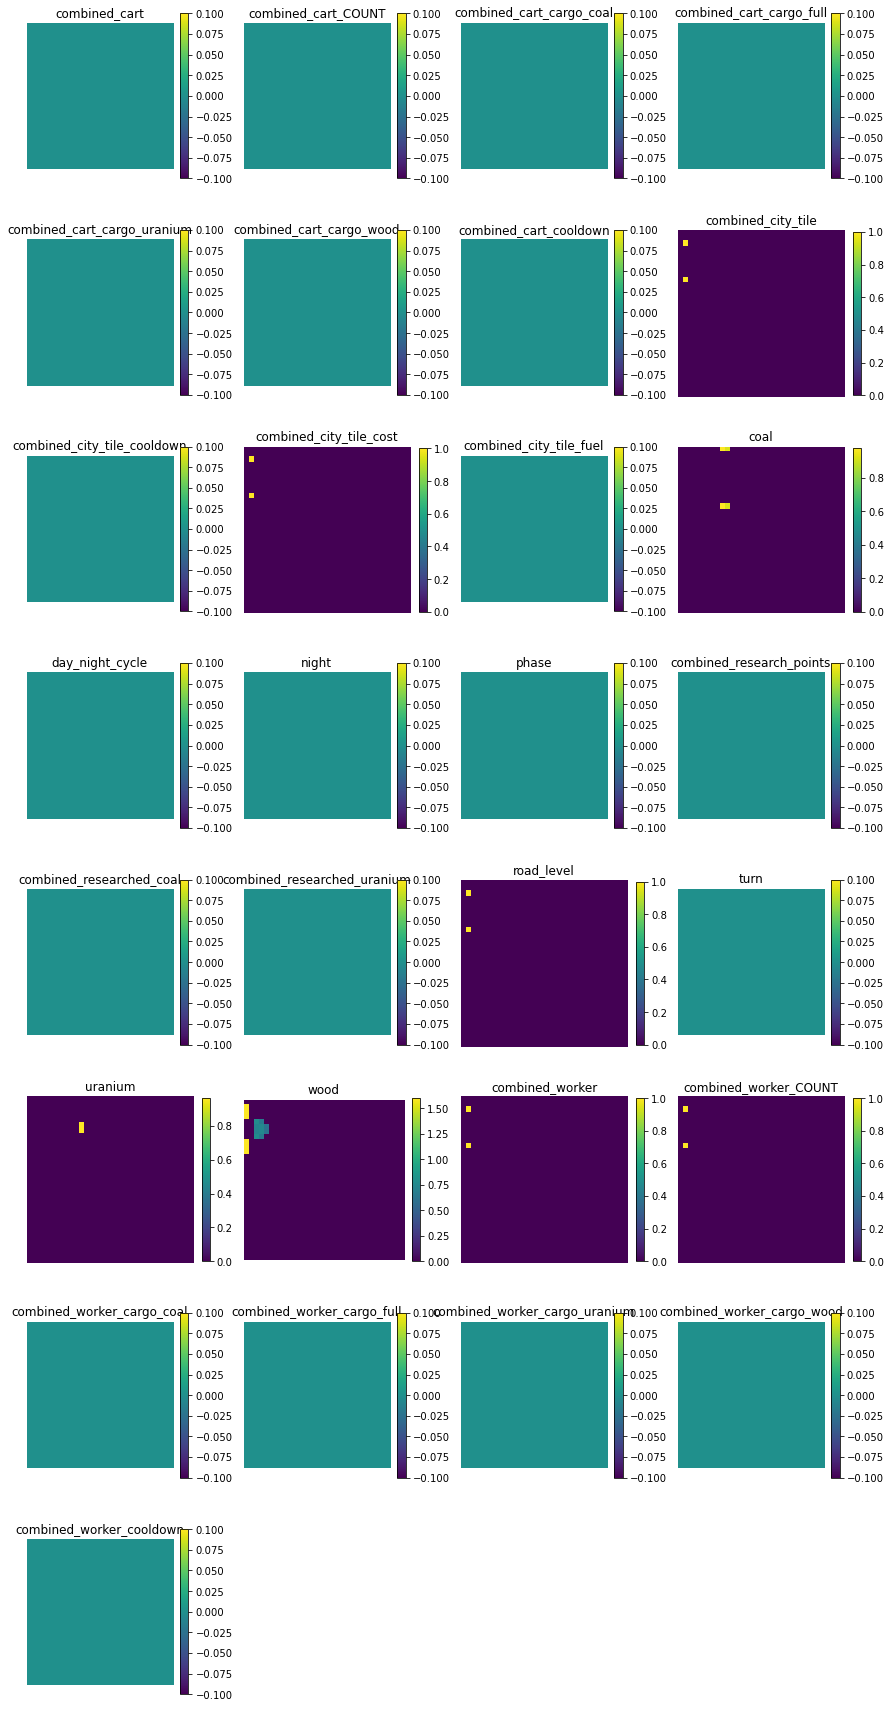

In [10]:
rl_agent = RLAgent(env.steps[0][0]["observation"], env.configuration)
turn = 0
rl_agent.set_to_turn(env.steps[turn][0]["observation"], env.configuration, turn)
obs = rl_agent.get_env_output()["obs"]

n = len(obs)
width = 4
height = math.ceil(n / width)
fig = plt.figure(constrained_layout=True, figsize=(3 * width, 3 * height))
subfigs = fig.subfigures(height, width).ravel()
cmap = "viridis"

for subfig_idx, (name, tensor) in enumerate(obs.items()):
    tensor = tensor.cpu()
    while len(tensor.shape) < 5:
        tensor = tensor.unsqueeze(-1)
    assert tensor.shape[0] == 1
    assert tensor.shape[1] == 1
    tensor = tensor[0, 0]
    tensor = tensor.expand(-1, 32, 32).clone()
    if tensor.shape[0] == 1:
        tensor = tensor[0]
    elif tensor.shape[0] == 2:
        #tensor[1] *= -1
        tensor = tensor.sum(dim=0)
        name = f"combined_{name}"
    else:
        raise ValueError(f"More than 2 players: {tensor.shape}")
    axes = subfigs[subfig_idx].subplots(1, 1)
    ax = axes
    #mappable = ax.imshow(tensor.numpy().T, cmap=cmap, norm=colors.LogNorm(vmin=1e-8, vmax=tensor.max().item() + 1.))
    mappable = ax.imshow(tensor.numpy().T, cmap=cmap)
    ax.set_title(name)
    ax.axis("off")
    subfigs[subfig_idx].colorbar(mappable, shrink=0.8)
